## Atividade Final

### Aplicar uma das técnicas vistas em sala de aula e um dataset de escolha

#### Disciplina : Aprendizagem de Máquina para Big Data
##### Professor : Allan Medeiros
##### Aluno : Rodrigo D. da Silva


### 1 . Instalando as Dependências

In [1]:
# Utilize este comando apenas se não possuir a biblioteca 'Caret' instalada

# install.packages("caret")

### 2 . Carregando as Dependências

In [2]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


### 3 . Carregando o Dataset

In [4]:
# carregando o dataset 

setwd("/Users/rsilva/Documents/UFRN/Hackathon/Resultados")

file <- read.csv2("reduced_20171123_2.csv", header=TRUE, sep=",")

In [7]:
# variaveis do dataset, dimensão e classes
str(file)

'data.frame':	84257331 obs. of  6 variables:
 $ id_componente: int  20001 20001 20001 20001 20001 20001 20001 20001 20001 20001 ...
 $ id_curso     : int  2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 ...
 $ ch_total     : int  60 60 60 60 60 60 60 60 60 60 ...
 $ horario      : int  3 3 3 3 3 3 2 2 2 2 ...
 $ periodo      : int  1 1 1 1 1 1 2 2 2 2 ...
 $ descricao    : Factor w/ 4 levels "APROVADO","DESISTENTE",..: 1 1 1 1 1 1 1 1 1 1 ...


#### 3.1 . Filtrando alguns cursos especificos

O objetivo aqui é reduzir o dataset a um volume ainda aceitável de dados a fim de validarmos o conceito.

    Administração - 2000002
    Arquitetura e urbanismo - 2000005
    Biblioteconomia - 2000006
    Ciências biológicas - 2000009
    Ciências contábeis - 2000011
    Ciência da computação - 2000013
    Ciências econômicas - 2000014
    Ciências sociais - 2000015
    Comunicação social - 2000016
    Direito - 2000018

In [6]:
cursos <- c(2000002,2000005,2000006,2000009,2000011,2000013,2000014,2000015,2000016,2000018)

In [8]:
dataset <- subset(file, file$id_curso %in% cursos & !is.na(file$descricao))

In [9]:
str(dataset)

'data.frame':	11771752 obs. of  6 variables:
 $ id_componente: int  20001 20001 20001 20001 20001 20001 20001 20001 20001 20001 ...
 $ id_curso     : int  2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 ...
 $ ch_total     : int  60 60 60 60 60 60 60 60 60 60 ...
 $ horario      : int  3 3 3 3 3 3 2 2 2 2 ...
 $ periodo      : int  1 1 1 1 1 1 2 2 2 2 ...
 $ descricao    : Factor w/ 4 levels "APROVADO","DESISTENTE",..: 1 1 1 1 1 1 1 1 1 1 ...


In [10]:
write.csv(dataset, "reduced_20171124_10cursos.csv", row.names=FALSE)

In [11]:
cursos5 <- c(2000005,2000011,2000013,2000015,2000016)

In [23]:
list_descricao <- c("APROVADO","DESISTENTE", "REPROVADO")

In [24]:
dataset5 <- subset(file, file$id_curso %in% cursos5 & file$descricao %in% list_descricao &!is.na(file$descricao))

In [29]:
str(dataset5)

'data.frame':	5490740 obs. of  6 variables:
 $ id_componente: int  20001 20001 20001 20001 20001 20001 20001 20001 20001 20001 ...
 $ id_curso     : int  2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 2000016 ...
 $ ch_total     : int  60 60 60 60 60 60 60 60 60 60 ...
 $ horario      : int  3 3 3 3 3 3 2 2 2 2 ...
 $ periodo      : int  1 1 1 1 1 1 2 2 2 2 ...
 $ descricao    : Factor w/ 3 levels "APROVADO","DESISTENTE",..: 1 1 1 1 1 1 1 1 1 1 ...


In [26]:
write.csv(dataset5, "reduced_20171124_5cursos.csv", row.names=FALSE)

In [28]:
dataset5 <- droplevels(dataset5)

### 4 . Criando os paramentros para treinamento e validação

In [30]:
# criando um validador para o dataset
# separando uma parte dos dados (75%) para treinamento
# e guardando os outros 25% para validar os resultados

# criando o indice para os 80% do dataset para treinamento
indice <- createDataPartition(dataset5$descricao, p=0.75, list=FALSE)

# separando a porção para validação
ds_validacao <- dataset[-indice,]

# separando a porção para treinamento
dataset <- dataset[indice,]

### 5 . Avaliando o Dataset para conhecê-lo melhor

In [31]:
# avaliando a distribuição das Especies
perc_descricao <- prop.table(table(dataset5$descricao)) * 100
cbind(freq=table(dataset5$descricao), percentage=perc_descricao)

,freq,percentage
APROVADO,4799233,87.40594164
DESISTENTE,4582,0.08344959
REPROVADO,686925,12.51060877


In [32]:
# resumo estatistico do dataset
summary(dataset5)

 id_componente        id_curso        ch_total         horario     
 Min.   :  20001   Min.   :2e+06   Min.   : 15.00   Min.   :1.000  
 1st Qu.:  24849   1st Qu.:2e+06   1st Qu.: 60.00   1st Qu.:1.000  
 Median :  25475   Median :2e+06   Median : 60.00   Median :2.000  
 Mean   :  63530   Mean   :2e+06   Mean   : 60.63   Mean   :2.133  
 3rd Qu.:  25639   3rd Qu.:2e+06   3rd Qu.: 60.00   3rd Qu.:3.000  
 Max.   :2055851   Max.   :2e+06   Max.   :270.00   Max.   :6.000  
    periodo          descricao      
 Min.   :1.00   APROVADO  :4799233  
 1st Qu.:1.00   DESISTENTE:   4582  
 Median :1.00   REPROVADO : 686925  
 Mean   :1.44                       
 3rd Qu.:2.00                       
 Max.   :2.00                       

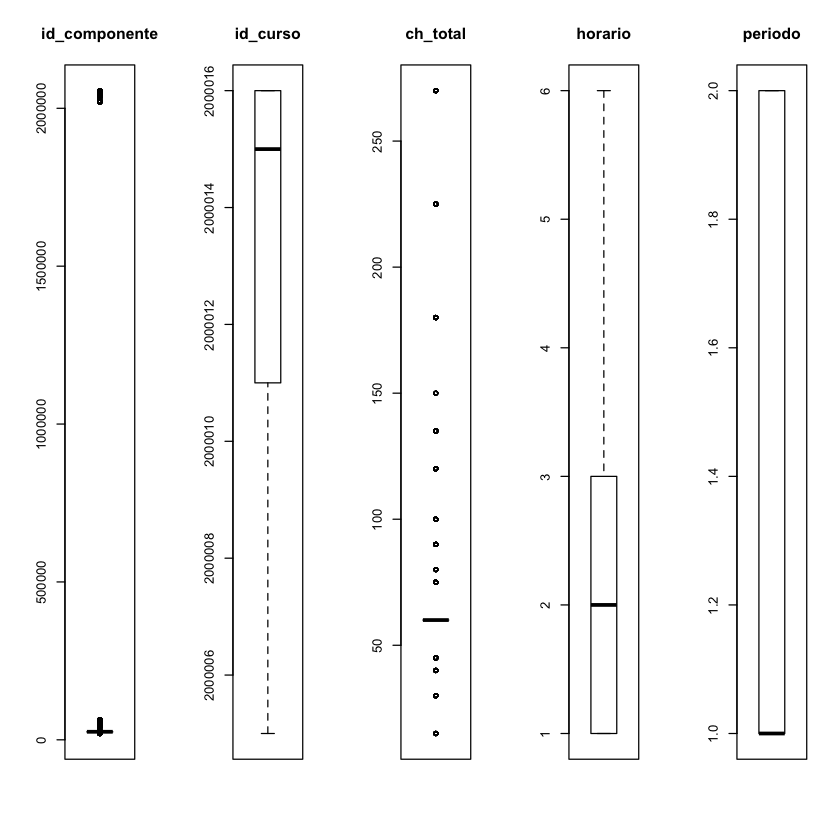

In [33]:
x <- dataset5[,1:5]
y <- dataset5[,6]
par(mfrow=c(1,5))
    for(i in 1:5){
        boxplot(x[,i], main=names(dataset5)[i])
    }

In [ ]:
# avaliando as interações entre as variáveis do dataset

# featurePlot(x=x, y=y, plot='ellipse')
# featurePlot(x=x, y=y, plot="box")

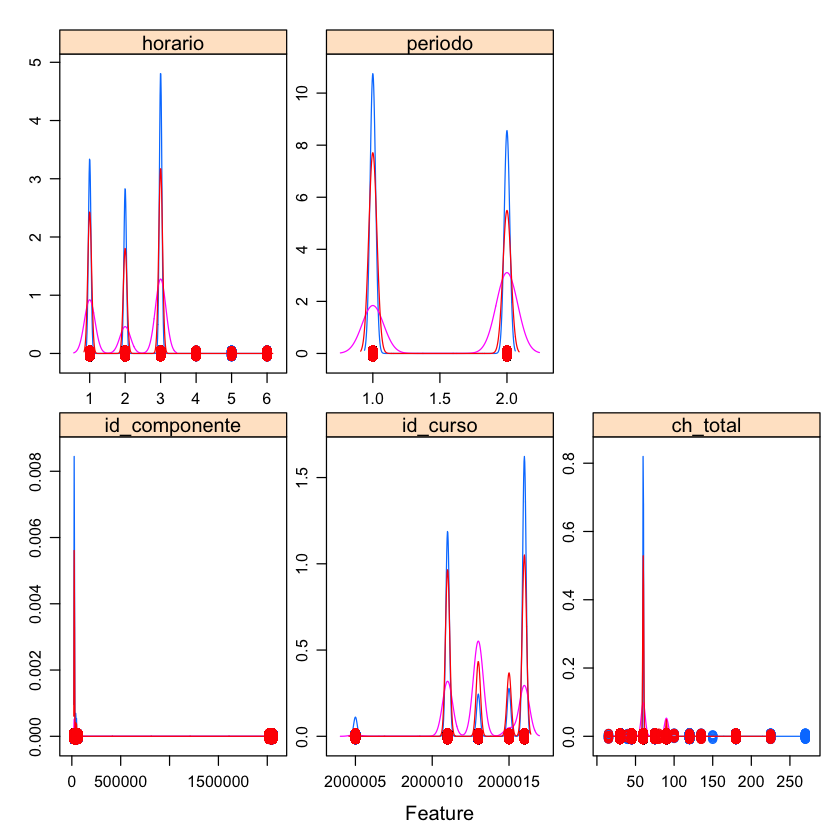

In [19]:
# avaliando a densidade para cada uma das variáveis

escalas <- list(x=list(relation='free'), y=list(relation='free'))
featurePlot(x=x, y=y, plot='density', scales=escalas)

### 6 . Teste de Harness para determinar o melhor algoritmo para este Dataset

In [34]:
# teste de Harness

# o objetivo deste teste é, parametricamente, 
# avaliar a execução de diferentes algoritmos
# informando a forma de iteração
# para este caso, o teste dividirá o dataset em 10 partes
# 9 para treinamento dos algoritmos e 1 para teste dos resultados

controle <- trainControl(method='cv', number=10)
metrica <- "Accuracy"

#### 6.1 . Construindo os modelos para 5 algoritmos

Método Linear
- Linear Discriminant Analysis (LDA)

Método Não-Linear
- Classification and Regression Trees (CART)
- k-Nearest Neighbors(kNN)

Método Não-Linear Complexo
- Support Vector Machines (LVM) (com Kernel linear)
- Random Forest (RF)

In [ ]:
set.seed(7)
lda <- train(descricao~., data=dataset, method='lda', metric=metrica, trControl=controle)

# set.seed(7)
# cart <- train(Species~., data=dataset, method='rpart', metric=metrica, trControl=controle)

# set.seed(7)
# knn <- train(Species~., data=dataset, method='knn', metric=metrica, trControl=controle)

# set.seed(7)
# svm <- train(Species~., data=dataset, method='svmRadial', metric=metrica, trControl=controle)

# set.seed(7)
# rf <- train(Species~., data=dataset, method='rf', metric=metrica, trControl=controle)


#### 6.2 . Recuperando os resultados a partir dos modelos

In [ ]:
# salvando o modelo

saveRDS(lda, "modelo_rn_lda_20171124_5cursos.rds")

In [ ]:
# recuperando e avaliando a acuracia de cada um dos modelos

# resultados <- resamples(list(lda=lda, cart=cart, knn=knn, svm=svm, rf=rf))
# summary(resultados)

print(lda)

In [ ]:
# dotplot(resultados)

In [ ]:
# conseguimos ver pelos resultados acima que o método LDA obteve melhor acuracia, 
# logo, foi aquele que melhores resultados para a amostra de dados em trabalho

# print(lda)

### 7 . Validando o resultado

##### Com o resultado acima, vamos utilizar o dataset 'ds_validacao' para testar o resultado

In [ ]:
predicao <- predict(lda, ds_validacao)
confusionMatrix(predicao, ds_validacao$descricao)

### 8 . Considerações Finais

Utilizei 5 algoritmos mais comuns dentre a literatura que utilizei para estudar. Podemos perceber que nem sempre a solução mais complexa é de fato a melhor, o grau de "simplicidade" do dataset pode influênciar o resultado quando aplicamos soluções mais robustas.

Realizei alguns testes referentes a proporção do dataset que separei para treinamento e a que separei para validação, a razão 80/20 demonstrou resultados já favoráveis a demonstração dos algoritmos durante o teste de Harness.